# Guided Project: Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

Quick overwiev. This data is from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [3]:
print(data.shape)
pd.options.display.max_columns = 137
print(data.head(5))

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

#### We want to figure out the role participants would be interested in working. Check if data is representative using frequency distribution table

In [4]:
job_role =  data['JobRoleInterest'].value_counts(normalize = True) * 100

In [5]:
job_role 

Full-Stack Web Developer                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                                       2.030892
  Mobile Developer                                                                                                                              

Percentage frequency distribution table. Most of them are interested in Web development.
There are quite a few people that are interested in more than one subject. Lets visualise that

In [6]:
two_more = data['JobRoleInterest'].dropna()
split_two_more = two_more.str.split(',')

how_many_freq = split_two_more.apply(lambda x: len(x))
print(how_many_freq.value_counts())

1     2213
3     1111
4     1064
5      842
2      761
6      470
7      270
8      123
9       69
10      33
12      21
11      13
13       2
Name: JobRoleInterest, dtype: int64


Lets visualise percentages

In [7]:
print(how_many_freq.value_counts(normalize = True).sort_index()*100)

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


Most of students have clear vision of what they intend to do in future and what they need to do so.
Lets go back to Job Role Interest. The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
Lets convert data to booleans and count them. then we will visualise them

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


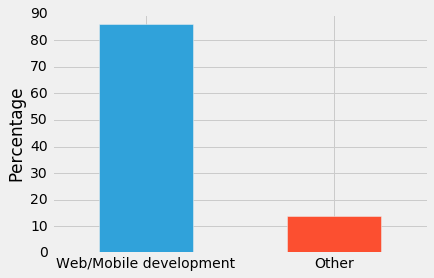

In [8]:
#frequency
web_mobile = two_more.str.contains('Web Developer|Mobile Developer')
web_mobile_freq = web_mobile.value_counts(normalize = True) * 100
print(web_mobile_freq)

#graph
#magic function to show plot
%matplotlib inline 
plt.style.use('fivethirtyeight')
web_mobile_freq.plot.bar()
plt.ylabel('Percentage')
plt.xticks([0,1],['Web/Mobile development', 'Other'], rotation = 0)
plt.show()

# Location of new coders

Now let's analize data about place of living of new coders, as well as density of each location. We are looking for two best countries to advertise in.
One indicator of a good market is the number of potential customers — the more potential customers in a market, the better.

In [9]:
data_two = data[data['JobRoleInterest'].notnull()].copy()

country = data_two['CountryLive'].dropna()
absolute_freq = country.value_counts()
relative_freq = country.value_counts(normalize = True)*100
print('Absolute freq:','\n',absolute_freq)
print('Relative freq:','\n',relative_freq)

Absolute freq: 
 United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                      

Now we have information about relative and absolute frequencies. Lets display this using table. 

In [10]:
pd.DataFrame(data = {'Absolute frequency':absolute_freq,
                    'Relative frequency':relative_freq})

,Absolute frequency,Relative frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


 We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.
From now, we will narrow our analysis to countries that have Relative frequency value over 3%.

# Spending money by students

Create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

In [11]:
drop_zeros = data_two['MonthsProgramming'].replace(0,1) #dont divide by 0
money = data_two['MoneyForLearning']

#new column
data_two['MoneyPerMonth'] = money / drop_zeros
data_two['MoneyPerMonth'].isnull().sum()


675

675 rows with 0 values. Now we want to keep rows without 0 in MoneyPerMonth column and CountryLive column

In [12]:
data_two = data_two[data_two['MoneyPerMonth'].notnull()] 
data_two['MoneyPerMonth'].isnull().sum()

0

In [13]:
data_two['CountryLive'].isnull().sum()

105

In [14]:
data_two = data_two[data_two['CountryLive'].notnull()] 
data_two['CountryLive'].isnull().sum()

0

Now, we group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [15]:
grouped = data_two.groupby('CountryLive').mean()
grouped['MoneyPerMonth'][['United States of America','Great Britain','India','Canada']]

CountryLive
United States of America    227.997996
Great Britain                25.272876
India                       135.100982
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

Now, we look for outliers in our data. Lets generate boxplots.

In [16]:
data_boxplot = data_two[data_two['CountryLive'].str.contains('United States of America|Great Britain|India|Canada')]
data_boxplot['CountryLive'].value_counts()

United States of America    2933
India                        463
Canada                       240
Great Britain                 17
Name: CountryLive, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



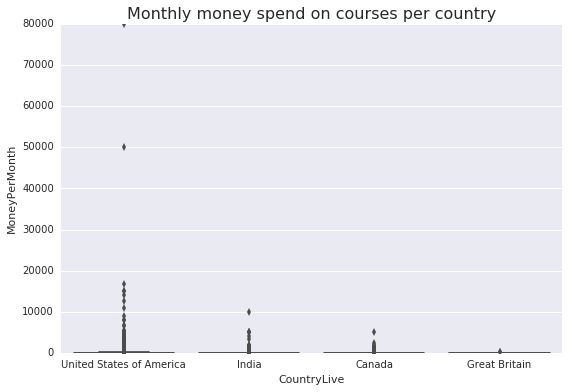

In [17]:
import seaborn as sns

sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = data_boxplot)
plt.title('Monthly money spend on courses per country', fontsize = 16)
plt.show()

Eliminate the extreme outliers in USA data.

In [18]:
data_two = data_two[data_two['MoneyPerMonth'] < 20000]

In [19]:
grouped2 = data_two.groupby('CountryLive').mean()
grouped2['MoneyPerMonth'][['United States of America','Great Britain','India','Canada']]

CountryLive
United States of America    183.800110
Great Britain                25.272876
India                       135.100982
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

The mean values still look off, look more for extreme outliers.

In [20]:
data_india = data_two[data_two['CountryLive'] == 'India']
india_over5k = data_india[data_india['MoneyPerMonth'] >= 2500]
india_over5k

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

Remove the outliers for India

In [21]:
data_two = data_two.drop(india_over5k.index)
grouped2 = data_two.groupby('CountryLive').mean()
grouped2['MoneyPerMonth'][['United States of America','Great Britain','India','Canada']]

CountryLive
United States of America    183.800110
Great Britain                25.272876
India                        65.758763
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

Examine outliers for others.

In [24]:
data_usa = data_two[data_two['CountryLive'] == 'United States of America']
usa_over6k = data_usa[data_usa['MoneyPerMonth'] >= 6000]
data_two = data_two.drop(usa_over6k.index)

In [25]:
grouped2 = data_two.groupby('CountryLive').mean()
grouped2['MoneyPerMonth'][['United States of America','Great Britain','India','Canada']]

CountryLive
United States of America    142.654608
Great Britain                25.272876
India                        65.758763
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [31]:
data_can = data_two[data_two['CountryLive'] == 'Canada']
can_over6k = data_can[data_can['MoneyPerMonth'] >= 5000]
data_two = data_two.drop(can_over6k.index)

In [32]:
grouped2 = data_two.groupby('CountryLive').mean()
grouped2['MoneyPerMonth'][['United States of America','Great Britain','India','Canada']]

CountryLive
United States of America    142.654608
Great Britain                25.272876
India                        65.758763
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

Visualise data again

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



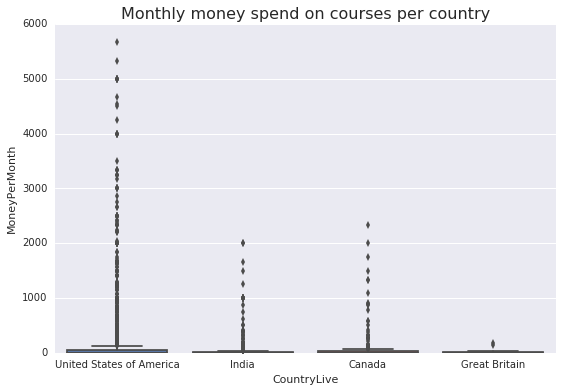

In [34]:
data_boxplot = data_two[data_two['CountryLive'].str.contains('United States of America|Great Britain|India|Canada')]
data_boxplot['CountryLive'].value_counts()

sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = data_boxplot)
plt.title('Monthly money spend on courses per country', fontsize = 16)
plt.show()

Now it looks much better. Now we know, that one of countries to advertise in is USA. Lets choose second one. Second best choice seems to be Canada, seems our course costs 59$ per month, and they are willing to pay over this price. Although, India has more potential customers. Lets examine that.

In [35]:
four_countries = data_two[data_two['CountryLive'].str.contains('United States of America|Great Britain|India|Canada')]
four_countries['CountryLive'].value_counts()

United States of America    2920
India                        457
Canada                       239
Great Britain                 17
Name: CountryLive, dtype: int64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.